## Hastings Direct Assessment

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./DS_Assessment.csv')

In [4]:
def explore(data):
    summaryDf = pd.DataFrame(data.dtypes, columns=['dtypes'])
    summaryDf = summaryDf.reset_index()
    summaryDf['Name'] = summaryDf['index']
    summaryDf['Missing'] = data.isnull().sum().values
    summaryDf['Total'] = data.count().values
    summaryDf['MissPerc'] = (summaryDf['Missing']/data.shape[0])*100
    summaryDf['NumUnique'] = data.nunique().values
    summaryDf['UniqueVals'] = [data[col].unique() for col in data.columns]
    print(summaryDf.head(30))

In [5]:
explore(df)

             index   dtypes            Name  Missing  Total  MissPerc  \
0              Age  float64             Age      483  49517     0.966   
1        Veh_Value  float64       Veh_Value      525  49475     1.050   
2              Tax  float64             Tax      517  49483     1.034   
3            Price  float64           Price      515  49485     1.030   
4      Veh_Mileage  float64     Veh_Mileage      509  49491     1.018   
5     Credit_Score  float64    Credit_Score      497  49503     0.994   
6   License_Length  float64  License_Length      498  49502     0.996   
7             Date   object            Date      497  49503     0.994   
8   Marital_Status   object  Marital_Status      483  49517     0.966   
9     Payment_Type   object    Payment_Type      484  49516     0.968   
10    Veh_Reg_Year  float64    Veh_Reg_Year      488  49512     0.976   
11            Sale    int64            Sale        0  50000     0.000   

    NumUnique                                     

In [6]:
df.head(10)

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Date,Marital_Status,Payment_Type,Veh_Reg_Year,Sale
0,68.234601,4385.559975,10.726928,395.881843,7299.380077,366.105677,8.711803,2016-05-14,M,Installments,2017.0,0
1,32.066145,6246.182948,7.869344,534.441400,5887.218868,306.560408,8.754815,2016-06-30,S,Cash,2015.0,0
2,52.039464,5753.093177,9.112318,472.386504,6327.126420,430.070380,6.942515,2016-10-02,M,Installments,2014.0,0
3,51.918920,5674.321541,11.657723,355.692599,7349.979218,493.840343,9.165431,2016-04-06,S,Cash,2011.0,0
4,28.472248,6674.864994,9.309519,327.209088,5471.606750,416.459533,6.810972,2016-10-14,S,Installments,2013.0,0
5,64.510299,7011.869761,12.885478,450.985258,7655.297440,376.064095,11.386787,2016-10-01,M,Cash,2013.0,0
6,61.594223,6185.473889,13.298141,423.213865,9166.468761,267.728480,8.043216,2016-12-22,M,Cash,2012.0,0
7,42.030555,5850.808973,8.970335,408.629620,5385.025061,356.708034,7.069777,2016-06-18,M,Installments,2015.0,0
8,40.692663,5449.655218,10.828371,456.473931,8675.226107,364.041093,9.715375,2016-03-27,S,Cash,2017.0,0
9,47.976908,5131.914728,9.595796,433.613970,7068.875839,284.350640,8.925822,2016-02-18,M,Installments,2012.0,0


## Exploratory Analysis

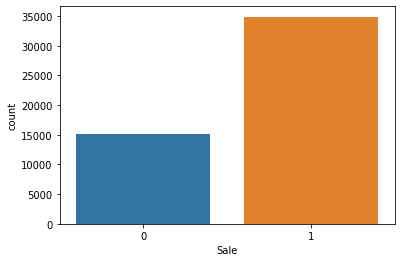

In [7]:
import seaborn as sns

sns.countplot(df.Sale)

Defining Chi Test for categorical features. This method returns the p value, a value in between 0 and 1, with 0 implying there is a strong relationship between the categorical feature in question and 1 implying the opposite.

In [182]:
from scipy import stats
import numpy as np

def chi2_cat_test(df, cat_var):
    vals = df.groupby([cat_var, 'Sale']).Sale.count().unstack().values
    p = stats.chi2_contingency(vals)
    print('p value of', np.round(p[1], 3), 'for variable', cat_var)

Correlation plot for continuous variables

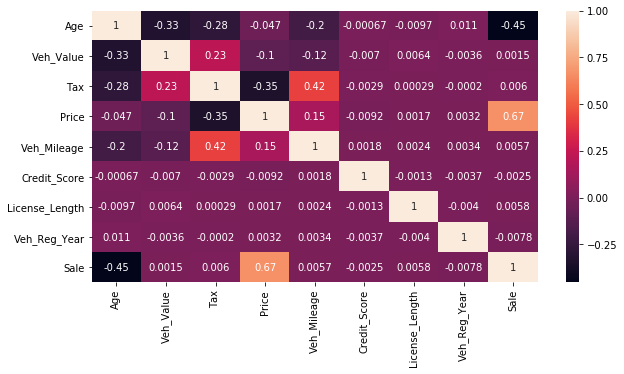

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(corr, annot=True)

Pair plot for continuous variables from overall dataframe

/Users/shaun/Repos/venv/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


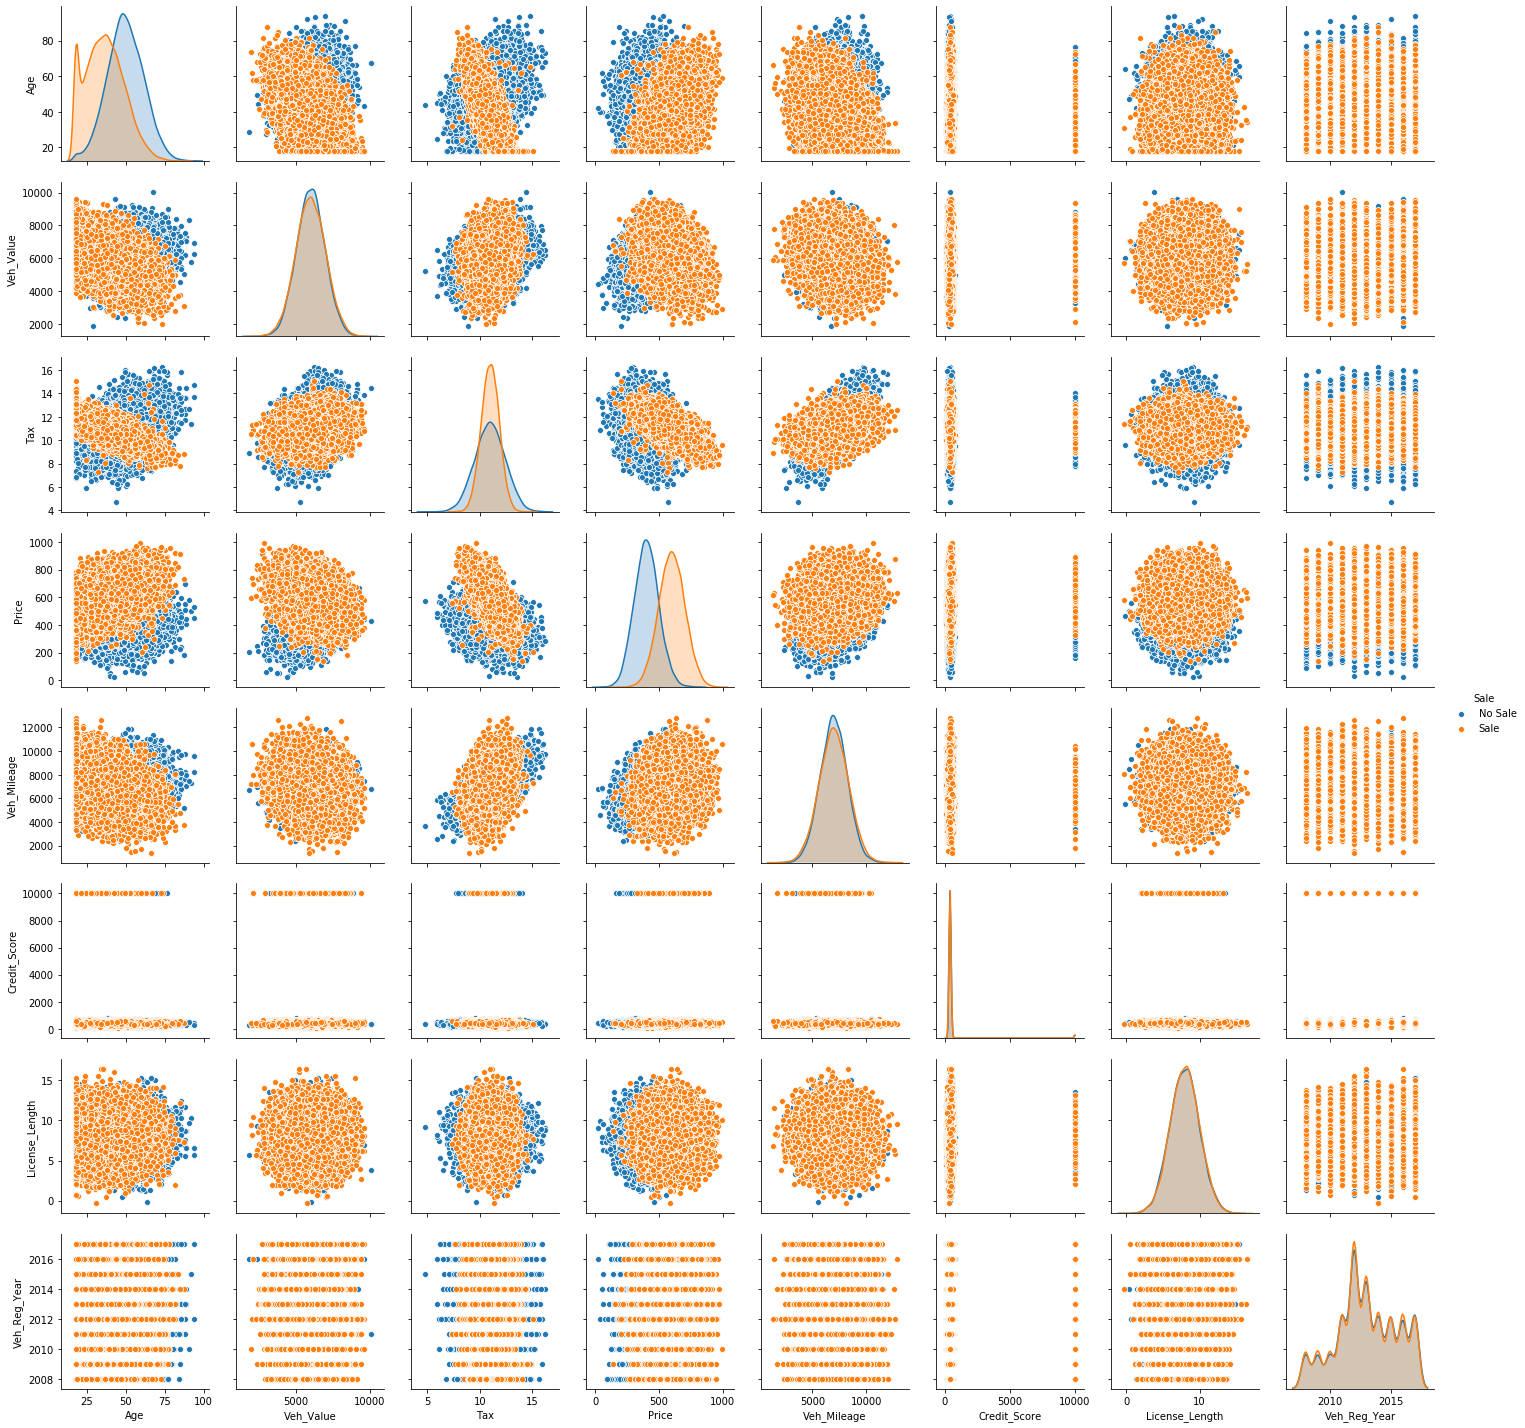

In [9]:
df_nona = df.dropna()
target_mapping = {
    0: 'No Sale',
    1: 'Sale'
}
df_nona.Sale.replace(target_mapping, inplace=True)
sns.pairplot(df_nona, hue='Sale')

In [10]:
df_nosale = df.loc[df.Sale==0]
df_sale = df.loc[df.Sale==1]

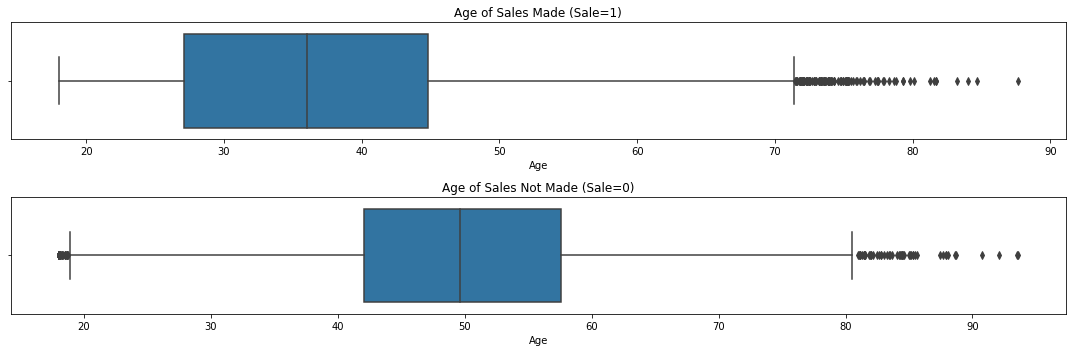

In [11]:
# ages - sales made/not made

fig = plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
ax1 = sns.boxplot(df_sale.Age)
ax1.title.set_text('Age of Sales Made (Sale=1)')
plt.subplot(2,1,2)
ax2 = sns.boxplot(df_nosale.Age)
ax2.title.set_text('Age of Sales Not Made (Sale=0)')
fig.tight_layout()
plt.show()


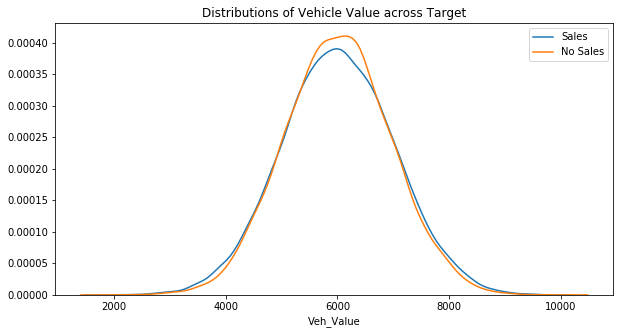

In [12]:
# vehicle value - sales made/not made

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_sale.loc[~df_sale.Veh_Value.isnull()].Veh_Value, hist=False, label='Sales')
ax2 = sns.distplot(df_nosale.loc[~df_nosale.Veh_Value.isnull()].Veh_Value, hist=False, label='No Sales')
plt.title('Distributions of Vehicle Value across Target')
plt.legend()
plt.show()

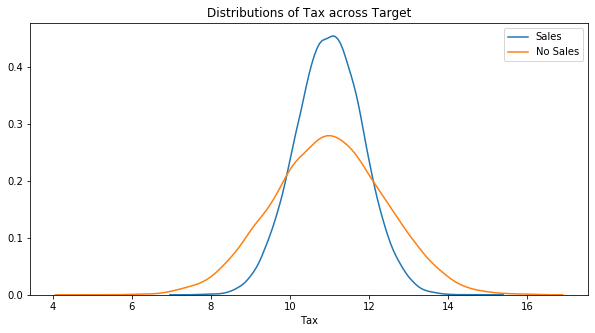

In [13]:
# tax - sales made/not made

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_sale.loc[~df_sale.Tax.isnull()].Tax, hist=False, label='Sales')
ax2 = sns.distplot(df_nosale.loc[~df_nosale.Tax.isnull()].Tax, hist=False, label='No Sales')
plt.title('Distributions of Tax across Target')
plt.legend()
plt.show()

Taking a further look at tax and vehicle value, especially the relationship between the two.

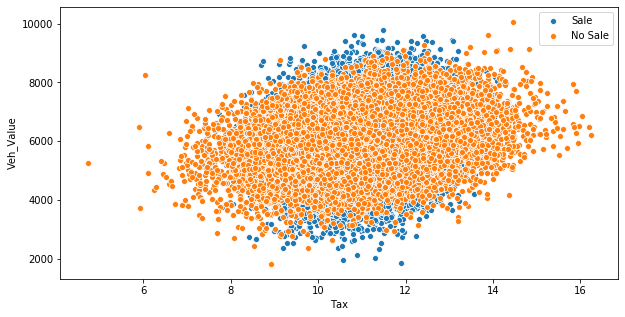

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Tax', y='Veh_Value', data=df_sale, label='Sale')
sns.scatterplot(x='Tax', y='Veh_Value', data=df_nosale, label='No Sale')
plt.legend()
plt.show()

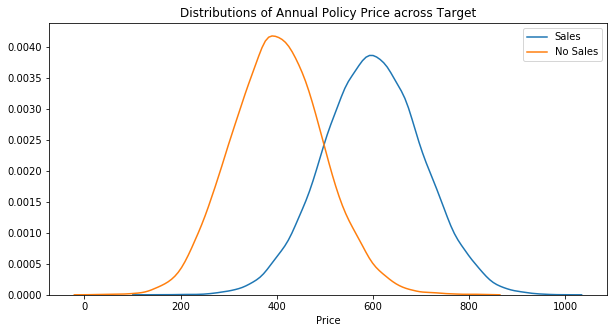

In [15]:
# price - sales made/not made

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_sale.loc[~df_sale.Price.isnull()].Price, hist=False, label='Sales')
ax2 = sns.distplot(df_nosale.loc[~df_nosale.Price.isnull()].Price, hist=False, label='No Sales')
plt.title('Distributions of Annual Policy Price across Target')
plt.legend()
plt.show()

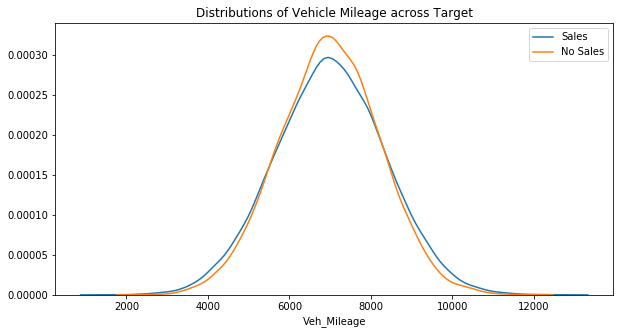

In [16]:
# vehicle mileage - sales made/not made
df_vehmil = df.loc[~df.Veh_Mileage.isnull()]

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_vehmil.loc[df_vehmil.Sale==1].Veh_Mileage, hist=False, label='Sales')
ax2 = sns.distplot(df_vehmil.loc[df_vehmil.Sale==0].Veh_Mileage, hist=False, label='No Sales')
plt.title('Distributions of Vehicle Mileage across Target')
plt.legend()
plt.show()

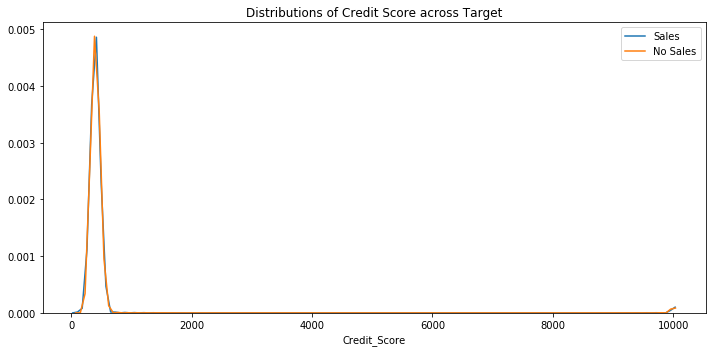

In [17]:
# credit score - sales made/not made

df_cs = df.loc[~df.Credit_Score.isnull()]

fig = plt.figure(figsize=(10,5))
# plt.subplot(2,1,1)
ax1 = sns.distplot(df_cs.loc[df_cs.Sale==1].Credit_Score, hist=False, label='Sales')
ax2 = sns.distplot(df_cs.loc[df_cs.Sale==0].Credit_Score, hist=False, label='No Sales')

# plt.subplot(2,1,2)
# sns.boxplot(x='Credit_Score', y='Sale', data=df_cs)
plt.title('Distributions of Credit Score across Target')
plt.legend()
fig.tight_layout()
plt.show()

Credit Score values are usually in the range 1-1000, therefore we can safely say that what is being seen here on the right of the graph is incorrect (some clients have credit scores of 9999). I couldn't find any information on what ranges Hastings Direct uses to define their credit score values, therefore I will need to pick from the three most popular ones: 
* 0-710 with TransUnion
* 0-999 with Experian
* 0-700 with Equifax.

Firstly I will have a look at those clients with an abnormally high credit score.

/Users/shaun/Repos/venv/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


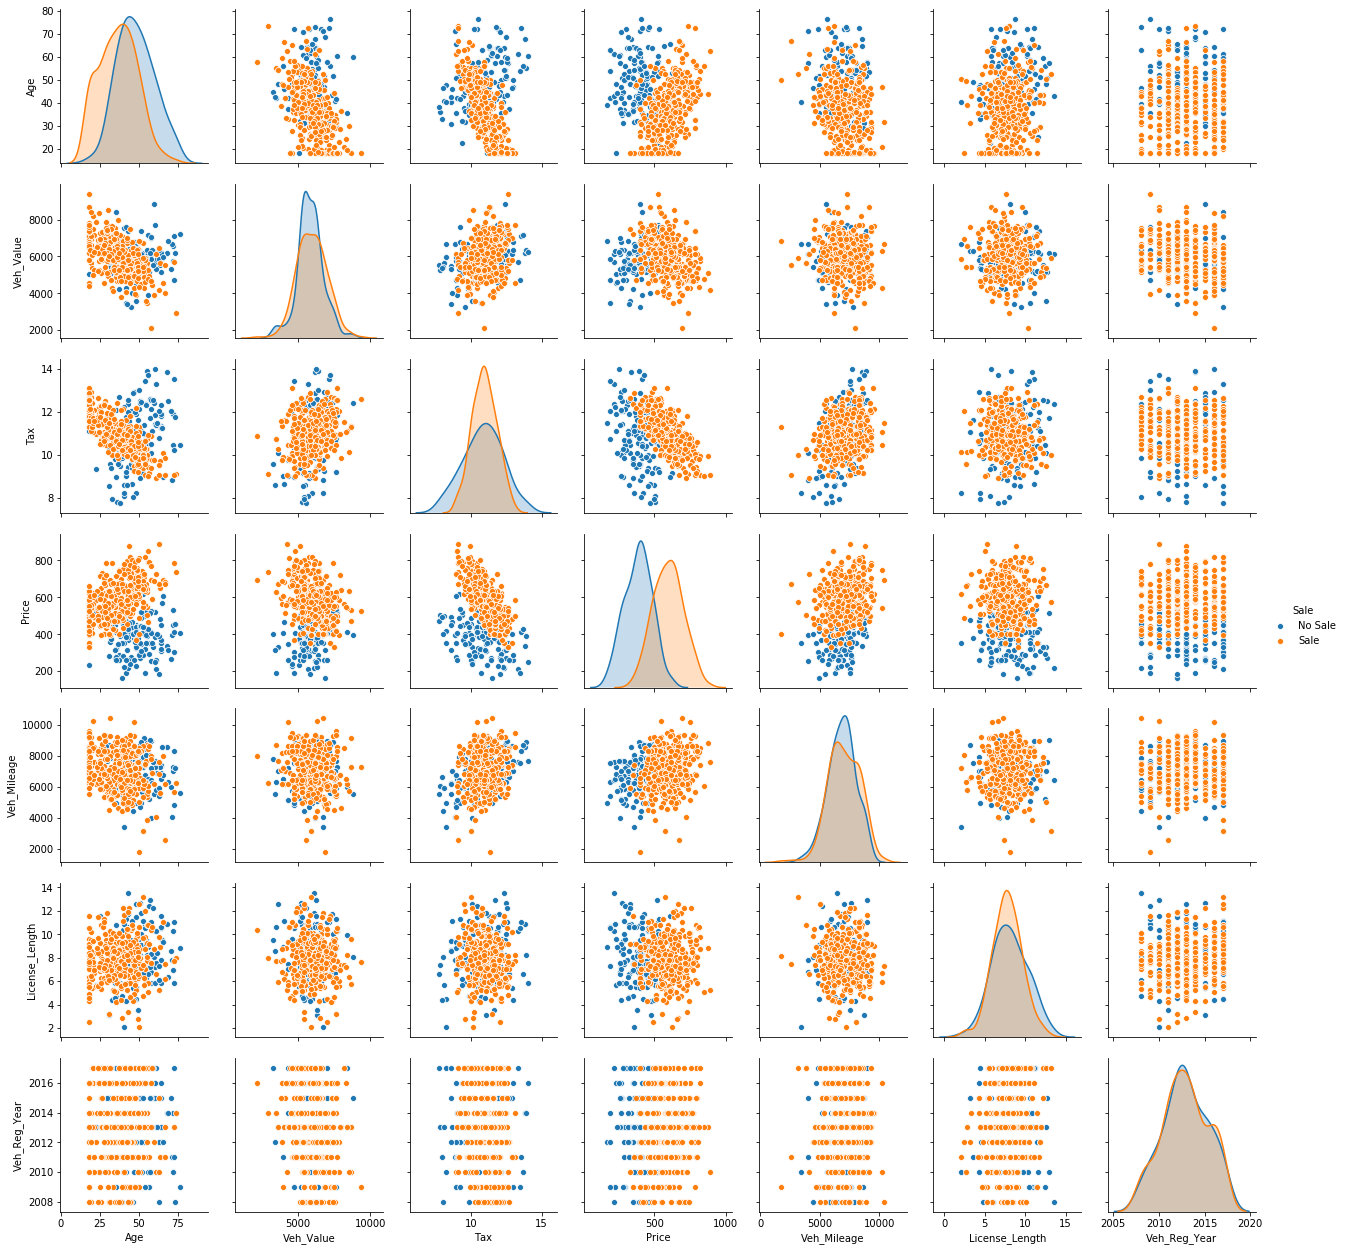

In [18]:
df_cs_high = df.loc[df.Credit_Score==9999]
target_mapping = {
    0: 'No Sale',
    1: 'Sale'
}
df_cs_high.Sale.replace(target_mapping, inplace=True)
sns.pairplot(df_cs_high.dropna().drop('Credit_Score', axis=1), hue='Sale')


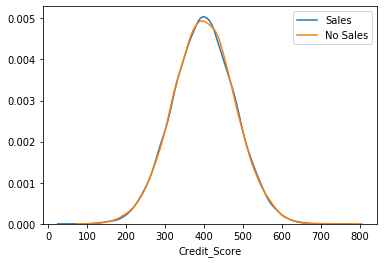

In [19]:
df_cs_nothigh = df.loc[(~df.Credit_Score.isnull()) & (df.Credit_Score != 9999)]
ax1 = sns.distplot(df_cs_nothigh.loc[df_cs_nothigh.Sale==1].Credit_Score, hist=False, label='Sales')
ax2 = sns.distplot(df_cs_nothigh.loc[df_cs_nothigh.Sale==0].Credit_Score, hist=False, label='No Sales')


In [20]:
df_cs_nothigh.Credit_Score.describe()


count    49003.000000
mean       399.322936
std         79.666780
min         55.887237
25%        345.705352
50%        399.247291
75%        453.015683
max        769.338103
Name: Credit_Score, dtype: float64

The max in this dataframe (without those customers with a Credit Score of 9999) is seen to be 769.33. Therefore it is assumed that the credit score range is like that of Experian so all Credit Scores with a value of 9999 are to be set as 999.

In [21]:
df.loc[df.Credit_Score==9999, 'Credit_Score'] = 999


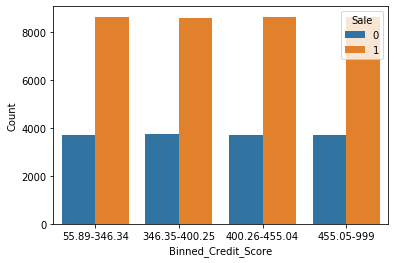

In [318]:
bins = [df.Credit_Score.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = ['55.89-346.34', '346.35-400.25', '400.26-455.04', '455.05-999']
df['Binned_Credit_Score'] = pd.cut(df['Credit_Score'], bins=bins, labels=labels)
df.groupby(['Binned_Credit_Score', 'Sale']).size().reset_index(name='Count')
sns.barplot(x='Binned_Credit_Score', y='Count', hue='Sale', data=cs_df)

In [22]:
# date column - split into day, month and year

df.Date = pd.to_datetime(df.Date)
df['Year_Start'] = [d.year for d in df.Date]
df['Month_Start'] = [d.month for d in df.Date]
df['Day_Start'] = [d.day for d in df.Date]
df['DayOfWeek_Start'] = [d.dayofweek for d in df.Date]
df.drop('Date', axis=1, inplace=True)


In [23]:
target_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}
df.DayOfWeek_Start.replace(target_mapping, inplace=True)


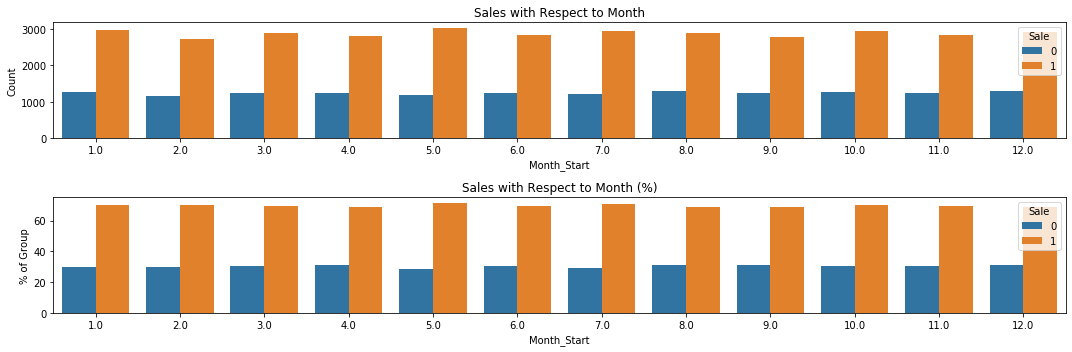

In [166]:
m_gp = df.groupby(['Month_Start', 'Sale']).size().reset_index(name='Count')
fig = plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.barplot(x='Month_Start', y='Count', hue='Sale', data=m_gp)
plt.title('Sales with Respect to Month')

df_temp = df.groupby(['Month_Start', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Month_Start', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Month_Start', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Month (%)')
plt.tight_layout()
plt.show()

In [183]:
chi2_cat_test(df, 'Month_Start')

p value of 0.175 for variable Month_Start


This p-value implies that there is some form of relationship between Month_Start and the Target (Sale)

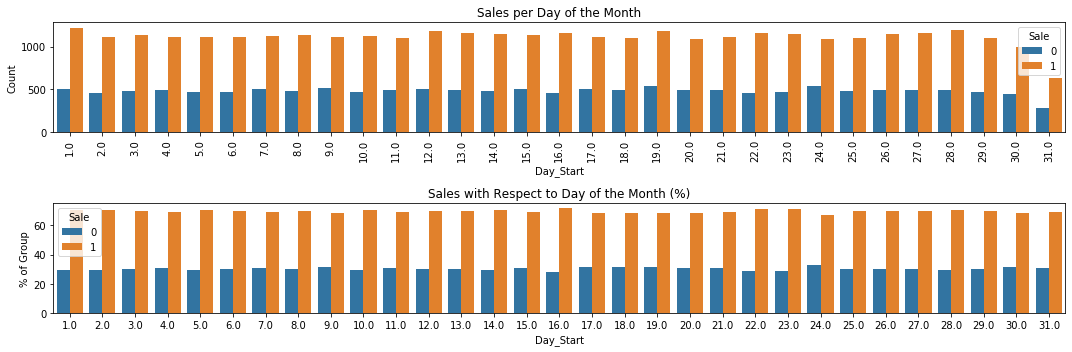

In [158]:
d_gp = df.groupby(['Day_Start', 'Sale']).size().reset_index(name='Count')
fig = plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.barplot(x='Day_Start', y='Count', hue='Sale', data=d_gp)
plt.title('Sales per Day of the Month')
plt.xticks(rotation=90)

df_temp = df.groupby(['Day_Start', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Day_Start', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Day_Start', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Day of the Month (%)')
plt.tight_layout()
plt.show()

In [184]:
chi2_cat_test(df, 'Day_Start')

p value of 0.791 for variable Day_Start


This p-value implies that there is some form of relationship between Day_Start and the Target (Sale), but it is much more independent from the Target than Month_Start.

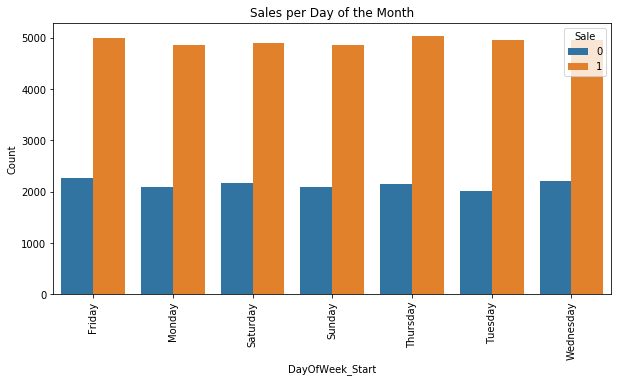

In [185]:
dw_gp = df.groupby(['DayOfWeek_Start', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x='DayOfWeek_Start', y='Count', hue='Sale', data=dw_gp)
plt.title('Sales per Day of the Month')
plt.xticks(rotation=90)
plt.show()

In [186]:
chi2_cat_test(df, 'DayOfWeek_Start')

p value of 0.072 for variable DayOfWeek_Start


This p-value implies that there is a strong relationship between DayOfWeek_Start and the Target (Sale)

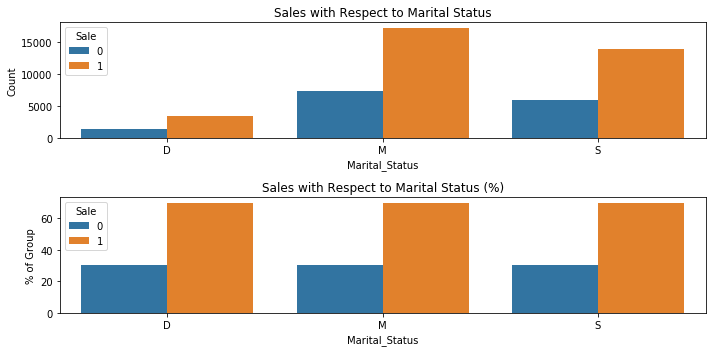

In [156]:
df_ms = df.groupby(['Marital_Status', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
ax = sns.barplot(x='Marital_Status', y='Count', hue='Sale', data=df_ms)
plt.title('Sales with Respect to Marital Status')

df_temp = df.groupby(['Marital_Status', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Marital_Status', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Marital_Status', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Marital Status (%)')
plt.tight_layout()
plt.show()

In [187]:
chi2_cat_test(df, 'Marital_Status')

p value of 0.876 for variable Marital_Status


This p-value implies that there is a weak relationship between Marital_Status and the Target (Sale)

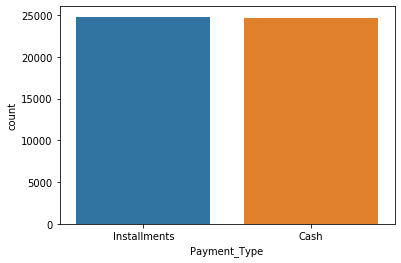

In [290]:
sns.countplot(df.Payment_Type)

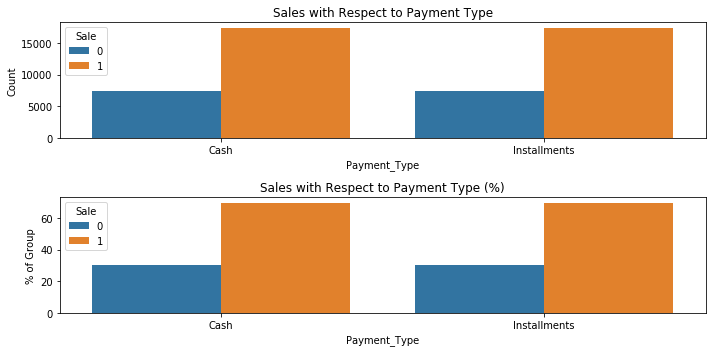

In [153]:
df_ms = df.groupby(['Payment_Type', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
ax = sns.barplot(x='Payment_Type', y='Count', hue='Sale', data=df_ms)
plt.title('Sales with Respect to Payment Type')

df_temp = df.groupby(['Payment_Type', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Payment_Type', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Payment_Type', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Payment Type (%)')
plt.tight_layout()
plt.show()


In [74]:
chi2_cat_test(df, 'Payment_Type')

0.9874898115161165

This p-value implies that there is a very weak relationship between Payment_Type and the Target (Sale)

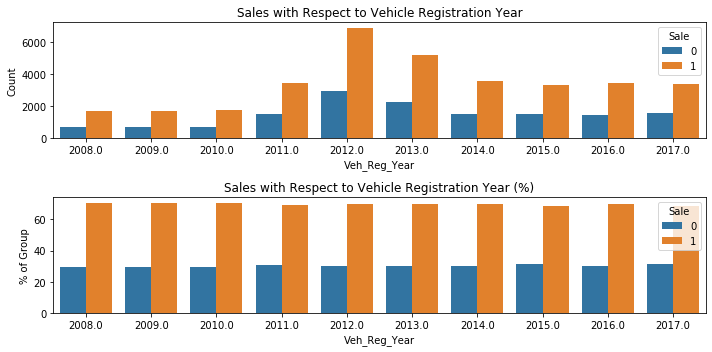

In [154]:
df_vry = df.groupby(['Veh_Reg_Year', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
ax = sns.barplot(x='Veh_Reg_Year', y='Count', hue='Sale', data=df_vry)
plt.title('Sales with Respect to Vehicle Registration Year')

df_temp = df.groupby(['Veh_Reg_Year', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Veh_Reg_Year', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Veh_Reg_Year', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Vehicle Registration Year (%)')
plt.tight_layout()
plt.show()


In [190]:
chi2_cat_test(df, 'Veh_Reg_Year')

p value of 0.498 for variable Veh_Reg_Year


## Imputing Missing Values

Since there are missing ages in the dataframe, and a driver can obtain their license at 18, the missing ages are assumed to be 18 + the length of time that the client has had their license.

In [258]:
df.loc[(df.Age.isnull()) & (~df.License_Length.isnull()), 'Age'] = df.License_Length + 18

In [259]:
df.loc[df.Age.isnull()]

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,...,DayOfWeek_Start,Binned_Price,Binned_Veh_Value,Binned_Tax,Price_sum,Veh_Value_sum,Tax_sum,Price_mean,Veh_Value_mean,Tax_mean
6758,NaN,4881.336485,9.859124,286.038182,6206.830752,389.128936,NaN,M,Installments,2016.0,...,Thursday,1,1,1,4.448325e+05,6.012104e+06,11985.971178,346.442751,4682.324291,9.334869
25426,NaN,7624.249367,NaN,597.131067,8587.932947,427.403889,NaN,S,Cash,2017.0,...,Saturday,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35872,NaN,5901.969928,10.095479,718.265633,5934.635476,260.526738,NaN,M,Installments,2013.0,...,Wednesday,4,2,1,1.104194e+06,8.561739e+06,14817.427876,730.287273,5662.525835,9.799886
46227,NaN,5284.644667,9.887684,744.095746,7654.209490,473.584247,NaN,S,Cash,2014.0,...,Monday,4,1,1,1.615595e+06,1.016984e+07,21218.988394,743.144100,4677.938859,9.760344


Now binning vehicle values based on quantiles so as to then group by price bin, tax bin and vehicle mileage bin and apply means to missing veh_value entries.

In [262]:
bins = [df.Veh_Mileage.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Veh_Mileage'] = pd.cut(df['Veh_Mileage'], bins=bins, labels=labels)

In [286]:
df_grpd_vv = df.groupby(['Binned_Veh_Mileage', 'Binned_Price', 'Binned_Tax'])['Veh_Value'].mean().reset_index()

for index, row in df_grpd_vv.iterrows():
    df.loc[(df.Veh_Value.isnull())
           & (df.Binned_Veh_Mileage==row.Binned_Veh_Mileage)
           & (df.Binned_Price==row.Binned_Price)
           & (df.Binned_Tax==row.Binned_Tax), 'Veh_Value'] = row['Veh_Value']

In [287]:
df.loc[df.Veh_Value.isnull()]

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,...,Binned_Price,Binned_Veh_Value,Binned_Tax,Price_sum,Veh_Value_sum,Tax_sum,Price_mean,Veh_Value_mean,Tax_mean,Binned_Veh_Mileage
25,54.520716,NaN,12.079819,NaN,8209.397320,470.666040,6.762009,M,Cash,2009.0,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,4
4922,46.381081,NaN,10.073810,NaN,8022.259407,372.598643,7.037395,D,Installments,2011.0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,4
5303,62.605276,NaN,NaN,364.444793,7719.143991,473.774511,7.615790,M,Cash,2012.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
6430,51.328434,NaN,9.476766,NaN,5549.964885,432.593844,8.676730,M,Cash,2016.0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1
20195,34.163101,NaN,NaN,429.600760,8081.448128,473.239505,10.036397,S,Installments,2012.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
22439,55.101824,NaN,10.514902,NaN,4764.597066,322.875251,10.660458,S,Cash,NaN,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1
25828,39.595972,NaN,10.274895,NaN,5382.327289,348.996260,7.227177,D,Cash,2015.0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1
35306,18.000000,NaN,12.679020,480.084956,NaN,512.405278,10.528729,S,Cash,2011.0,...,2,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35749,44.595384,NaN,NaN,628.006744,6276.444937,256.039679,8.953737,S,Installments,2012.0,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
36221,35.064982,NaN,11.327529,NaN,4797.916632,350.796974,NaN,M,Cash,2015.0,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,1


In [289]:
df.loc[df.Tax.isnull()]

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,...,Binned_Price,Binned_Veh_Value,Binned_Tax,Price_sum,Veh_Value_sum,Tax_sum,Price_mean,Veh_Value_mean,Tax_mean,Binned_Veh_Mileage
97,58.421368,5790.967653,NaN,404.956070,NaN,423.479659,6.743566,S,Cash,2012.0,...,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,37.053858,4769.900683,NaN,229.230413,7035.661803,389.184631,6.438842,M,Installments,2015.0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
496,52.473465,6877.785698,NaN,518.674537,8571.028706,436.651100,9.608121,M,Cash,2013.0,...,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
557,40.268959,4342.646219,NaN,197.981281,5689.645307,412.537539,7.406665,M,Installments,2009.0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
577,66.461762,6238.530007,NaN,420.777358,7062.111182,235.306403,6.556205,M,Installments,2013.0,...,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49522,36.588651,7034.517893,NaN,646.542295,8190.809216,262.152130,8.669170,S,Installments,2009.0,...,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
49705,18.000000,6590.687120,NaN,552.208474,7711.519735,548.066436,7.106467,S,Cash,2009.0,...,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
49749,31.838826,7313.048308,NaN,553.438336,4819.926621,347.467023,9.157307,S,Cash,2013.0,...,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
49933,26.649512,5481.738870,NaN,767.929410,9780.000889,394.117040,8.353796,M,Cash,2012.0,...,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [291]:
df.columns

Index(['Age', 'Veh_Value', 'Tax', 'Price', 'Veh_Mileage', 'Credit_Score',
       'License_Length', 'Marital_Status', 'Payment_Type', 'Veh_Reg_Year',
       'Sale', 'Year_Start', 'Month_Start', 'Day_Start', 'DayOfWeek_Start',
       'Binned_Price', 'Binned_Veh_Value', 'Binned_Tax', 'Price_sum',
       'Veh_Value_sum', 'Tax_sum', 'Price_mean', 'Veh_Value_mean', 'Tax_mean',
       'Binned_Veh_Mileage'],
      dtype='object')

In [297]:
df.loc[df.Day_Start.isnull()]

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,...,Binned_Price,Binned_Veh_Value,Binned_Tax,Price_sum,Veh_Value_sum,Tax_sum,Price_mean,Veh_Value_mean,Tax_mean,Binned_Veh_Mileage
29,44.899473,6834.435300,9.327742,444.031613,5922.570651,327.593791,5.259217,S,Installments,2009.0,...,1,4,1,7.543779e+04,1.356580e+06,1860.110470,390.869391,7028.913847,9.637878,1
166,57.067375,6742.141383,9.408536,564.822916,6274.953349,344.409139,4.358438,M,Cash,2013.0,...,3,4,1,3.349637e+05,4.076895e+06,5549.069562,594.962247,7241.376952,9.856251,2
210,30.627134,5608.754448,8.988230,369.960101,5636.843613,489.263752,5.959063,M,Installments,2012.0,...,1,2,1,3.049147e+05,4.695833e+06,7855.444249,368.254524,5671.295563,9.487252,1
222,57.924441,5344.483001,9.577831,381.982192,5274.393311,479.814374,8.040945,M,Installments,2011.0,...,1,2,1,3.049147e+05,4.695833e+06,7855.444249,368.254524,5671.295563,9.487252,1
392,65.371525,4909.686211,11.222580,494.766151,8632.072938,244.735204,8.657621,D,Installments,2014.0,...,2,1,3,2.511162e+05,2.414703e+06,5606.586778,508.332315,4888.063668,11.349366,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49356,41.487045,5534.011526,10.745116,651.960430,6873.738232,343.805171,3.535581,M,Installments,2013.0,...,4,2,2,7.639801e+05,6.237935e+06,11694.756556,695.159333,5676.010002,10.641271,2
49426,24.314083,7500.664428,12.360540,554.762190,6328.654906,505.620482,8.318179,S,Cash,2015.0,...,3,4,4,3.203894e+05,4.012476e+06,6659.349199,582.526157,7295.411345,12.107908,2
49592,37.723476,5464.888708,10.984536,711.918541,8871.557982,387.132768,7.086300,M,Cash,2012.0,...,4,2,2,7.639801e+05,6.237935e+06,11694.756556,695.159333,5676.010002,10.641271,4
49830,53.142906,4809.228073,9.719116,722.761000,7409.258618,364.532986,6.455724,M,Cash,2016.0,...,4,1,1,1.615595e+06,1.016984e+07,21218.988394,743.144100,4677.938859,9.760344,3


In [295]:
df.loc[df.Marital_Status.isnull()]

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,...,Binned_Price,Binned_Veh_Value,Binned_Tax,Price_sum,Veh_Value_sum,Tax_sum,Price_mean,Veh_Value_mean,Tax_mean,Binned_Veh_Mileage
53,37.776179,6154.387845,10.407202,221.247554,4568.956359,534.494256,6.503109,NaN,Installments,2010.0,...,1,3,2,1.744002e+05,2.944051e+06,4973.328951,374.249329,6317.705261,10.672380,1
118,64.001906,8368.951648,14.760441,313.642109,7536.037268,457.366712,6.832057,NaN,Cash,2013.0,...,1,4,4,6.740024e+05,1.305602e+07,22525.096331,376.958849,7302.022468,12.597929,3
255,50.152641,5772.256311,11.420095,260.633892,6208.495988,308.738272,7.033235,NaN,Cash,2013.0,...,1,2,3,2.042353e+05,3.254684e+06,6486.827891,356.431612,5680.077035,11.320817,2
309,48.989907,6658.088636,11.402807,434.008138,7608.588832,385.673632,5.037957,NaN,Cash,2012.0,...,1,3,3,2.241853e+05,3.785447e+06,6785.177251,374.891803,6330.178675,11.346450,3
321,44.534350,4409.479547,9.026497,469.088954,7130.590719,379.259524,7.035637,NaN,NaN,2012.0,...,2,1,1,1.698571e+05,1.705586e+06,3216.432639,485.306095,4873.103146,9.189808,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49490,61.514103,6523.249315,9.030954,643.528643,4864.916771,447.233154,7.578511,NaN,Installments,2015.0,...,4,3,1,8.206514e+05,7.229821e+06,11212.758828,716.726113,6314.253987,9.792802,1
49498,40.278882,5812.400299,10.752890,663.321779,6409.620195,356.588021,6.243901,NaN,Installments,2011.0,...,4,2,2,7.639801e+05,6.237935e+06,11694.756556,695.159333,5676.010002,10.641271,2
49548,20.374219,6302.104037,11.487249,409.645782,6670.988152,407.583778,7.601202,NaN,Cash,2011.0,...,1,3,3,2.241853e+05,3.785447e+06,6785.177251,374.891803,6330.178675,11.346450,2
49716,46.542963,5157.918773,9.940082,733.620579,6523.629649,403.954911,6.622068,NaN,Cash,2014.0,...,4,1,1,1.615595e+06,1.016984e+07,21218.988394,743.144100,4677.938859,9.760344,2


In [298]:
df.loc[df.License_Length.isnull()]

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,...,Binned_Price,Binned_Veh_Value,Binned_Tax,Price_sum,Veh_Value_sum,Tax_sum,Price_mean,Veh_Value_mean,Tax_mean,Binned_Veh_Mileage
85,43.258134,7970.853142,11.291915,493.749262,6917.933573,295.862672,NaN,M,Cash,2012.0,...,2,4,3,7.312440e+05,1.066654e+07,16496.338686,502.918826,7335.998846,11.345487,2
141,27.773677,4725.456264,8.027674,358.877047,5504.329637,415.758890,NaN,S,Cash,2013.0,...,1,1,1,4.448325e+05,6.012104e+06,11985.971178,346.442751,4682.324291,9.334869,1
276,44.671200,5676.070243,10.208591,525.925377,7837.136239,359.689522,NaN,M,Installments,2008.0,...,2,2,1,2.523770e+05,2.915936e+06,4831.319121,491.962922,5684.085052,9.417776,3
313,30.353631,5328.409322,8.384091,296.086466,4950.426814,379.487024,NaN,S,Cash,2013.0,...,1,1,1,4.448325e+05,6.012104e+06,11985.971178,346.442751,4682.324291,9.334869,1
385,40.254952,7452.001783,9.570057,645.882582,8353.514641,408.334390,NaN,NaN,Installments,2015.0,...,4,4,1,5.746061e+05,5.818376e+06,7944.740377,706.772628,7156.673877,9.772128,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49424,34.822762,5143.658372,11.744509,681.121885,9856.110966,370.364635,NaN,M,Cash,2014.0,...,4,1,4,9.150128e+04,6.390223e+05,1603.072617,677.787282,4733.498225,11.874612,4
49589,23.048820,5313.957352,12.892587,522.004642,9273.814040,377.759482,NaN,M,Cash,2012.0,...,2,1,4,2.981918e+05,2.882257e+06,7219.376062,502.006368,4852.284001,12.153832,4
49783,75.403963,3478.070416,9.453883,710.906299,7232.846996,536.164473,NaN,M,Installments,NaN,...,4,1,1,1.615595e+06,1.016984e+07,21218.988394,743.144100,4677.938859,9.760344,3
49897,18.000000,5657.643032,12.485641,522.472942,8965.997946,567.491251,NaN,S,Cash,2017.0,...,2,2,4,4.659641e+05,5.316180e+06,11337.677170,499.425566,5697.942081,12.151851,4


In [319]:
# impute missing values
# remove rows that have 3 or more nulls 
# payment type - nearly 50/50 so can input nulls at random
# license length - get age group (18-25, 25-65, 65+), and place mean in license length
# credit score - plotting according to quantiles implies identical sale/no sale
# marital status, group by age and license length
# important - in the beginning remove rows that have no start date

## Adding Features

In [202]:
# applying bins to Veh_Value/Tax/Price to then be grouped by 

bins = [df.Price.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Price'] = pd.cut(df['Price'], bins=bins, labels=labels)

bins = [df.Veh_Value.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Veh_Value'] = pd.cut(df['Veh_Value'], bins=bins, labels=labels)

bins = [df.Tax.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Tax'] = pd.cut(df['Tax'], bins=bins, labels=labels)

In [225]:
cols = ['Price', 'Veh_Value', 'Tax']
grpd = df.groupby(['Binned_Price', 'Binned_Veh_Value', 'Binned_Tax'])
sums = grpd[cols].sum().add_suffix('_sum')
avgs = grpd[cols].mean().add_suffix('_mean')

grpd_df = pd.concat([sums, avgs], axis=1).reset_index()

cols_add = ['Price_sum', 'Veh_Value_sum', 'Tax_sum', 'Price_mean', 'Veh_Value_mean', 'Tax_mean']

for index, row in grpd_df.iterrows():
    for col in cols_add:
        df.loc[(df['Binned_Price']==row['Binned_Price'])
                         & (df['Binned_Veh_Value']==row['Binned_Veh_Value'])
                         & (df['Binned_Tax']==row['Binned_Tax']), col] = row[col]
    